<a href="https://colab.research.google.com/github/gopika20nair/Solubility-Prediction-of-drug-compounds-ML-Demo/blob/main/regression(mied).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rdkit-pypi mordredcommunity[full] molfeat[dgl]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.4/495.4 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.1/226.1 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving mordred_train.csv to mordred_train.csv
Saving morgan_train.csv to morgan_train.csv
Saving gin_infomax_train.csv to gin_infomax_train.csv
Saving mordred_test.csv to mordred_test.csv
Saving avalon_train.csv to avalon_train.csv
Saving rdkit_train.csv to rdkit_train.csv
Saving morgan_test.csv to morgan_test.csv
Saving gin_infomax_test.csv to gin_infomax_test.csv
Saving erg_train.csv to erg_train.csv
Saving avalon_test.csv to avalon_test.csv
Saving maccs_train.csv to maccs_train.csv
Saving rdkit_test.csv to rdkit_test.csv
Saving erg_test.csv to erg_test.csv
Saving y_test.csv to y_test.csv
Saving y_train.csv to y_train.csv
Saving maccs_test.csv to maccs_test.csv


In [ ]:
feature_sets = ["gin_infomax", "mordred", "rdkit", "morgan", "maccs", "avalon", "erg"]

In [ ]:
train_feats, test_feats = [], []

for feat in feature_sets:
    train_data = pd.read_csv(f"{feat}_train.csv").replace([np.inf, -np.inf], np.nan).fillna(0).to_numpy()
    test_data = pd.read_csv(f"{feat}_test.csv").replace([np.inf, -np.inf], np.nan).fillna(0).to_numpy()
    train_feats.append(train_data)
    test_feats.append(test_data)

X_train = np.concatenate(train_feats, axis=1)
X_test = np.concatenate(test_feats, axis=1)

In [ ]:
y_train = pd.read_csv("y_train.csv").values.ravel()
y_test = pd.read_csv("y_test.csv").values.ravel()

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
base_rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
selector = RFE(base_rf, n_features_to_select=128, step=0.1)
selector.fit(X_train_scaled, y_train)

RFE(estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
    n_features_to_select=128, step=0.1)

In [ ]:
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

In [ ]:
rf_selected = RandomForestRegressor(n_estimators=100, random_state=42)
rf_selected.fit(X_train_selected, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_selected.predict(X_test_selected)

In [ ]:
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

R² Score: 0.8291921840288861
RMSE: 0.9623142791110432
MAE: 0.6493051168220322
Mean Squared Error: 0.9260487717810066


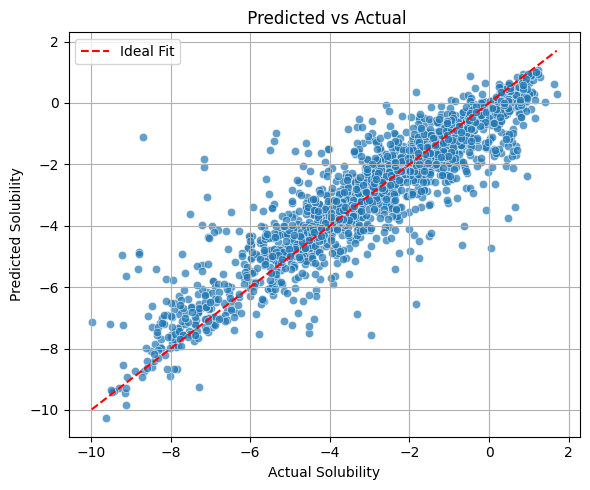

In [ ]:

    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Ideal Fit')
    plt.title(f" Predicted vs Actual")
    plt.xlabel("Actual Solubility")
    plt.ylabel("Predicted Solubility")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()